In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = "Homework4-seqs-with-primers.fna" 


with open(file,"r") as fin:
    line_count = sum(1 for line in fin)
line_count/=2

print(line_count)

with open(file,"r") as fin:
    fin.readline() #get first header out
    seq_length = len(fin.readline())

print(seq_length)

countArray = np.zeros((int(seq_length-1),5))

# fill array 
for i in range(seq_length):
    if(i%100 == 0): print(int(i/seq_length*100),"%")
    with open(file,"r") as fin:
        for line in fin:
            if line[0] != '>':
                if line[i] == 'A': countArray[i][0]+=1
                elif line[i] == 'C': countArray[i][1]+=1
                elif line[i] == 'G': countArray[i][2]+=1
                elif line[i] == 'T': countArray[i][3]+=1
                elif line[i] == '_': countArray[i][4]+=1

print (countArray)

freqArray = np.zeros((int(seq_length-1)))

for i in range(int(seq_length-1)):
    top = max(countArray[i][0],countArray[i][1],countArray[i][2],countArray[i][3])
    freqArray[i] = top/line_count

print (freqArray)
Sol1DF = pd.DataFrame(freqArray,columns=["conservation rate"])
Sol1DF.to_csv("solution-problem-1.txt")



5088.0
1515
0 %
6 %
13 %
19 %
26 %
33 %
39 %
46 %
52 %
59 %
66 %
72 %
79 %
85 %
92 %
99 %
[[3784.  434.  450.  420.    0.]
 [ 429.  417. 3776.  466.    0.]
 [3780.  464.  411.  433.    0.]
 ...
 [ 365. 3826.  464.  433.    0.]
 [ 383.  455.  463. 3787.    0.]
 [ 450.  402.  435. 3801.    0.]]
[0.74371069 0.74213836 0.74292453 ... 0.75196541 0.74430031 0.74705189]


In [16]:
def smoothing(freqArray,smoothWidth,seq_length):
    smoothArray = np.zeros_like(freqArray)
    for i in range(int(seq_length-1)):
        sum = 0 
        count = 0
        for j in range(-smoothWidth,smoothWidth): #if in bounds 
            if i+j > 0 and i+j < seq_length-1:
                dif =abs(i-abs(j))/2
                sum+=dif*freqArray[i+j]
                count+=dif
        smoothArray[i] = sum/count
    return smoothArray

smoothArray = smoothing(freqArray,35,seq_length)
print(smoothArray)

x = list(range(0,int(seq_length-1)))

[0.53839682 0.52826901 0.51884059 ... 0.43015979 0.43952141 0.44984374]


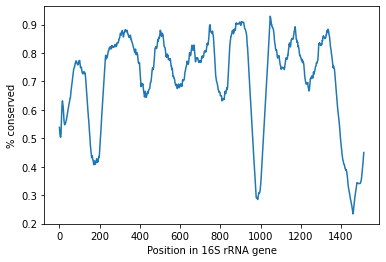

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(x,smoothArray, '-o',markersize = 0)

plt.xlabel("Position in 16S rRNA gene")
plt.ylabel("% conserved")
plt.show()
plt.savefig("solution-problem-2.pdf")  

In [33]:
mean = sum(smoothArray)/len(smoothArray)
print (mean)

start = []
if smoothArray[0] < mean: start.append(0)
stop = []

for i in range(1,len(smoothArray)-1):
    if smoothArray[i] > mean and smoothArray[i+1] < mean:
        start.append(i)
    if smoothArray[i] > mean and smoothArray[i-1] < mean:
        stop.append(i)
if smoothArray[len(smoothArray)-1] < mean: stop.append(len(smoothArray))
print(start,stop)

d = {'Start':start,'Stop':stop}
Sol3DF = pd.DataFrame(d)
Sol3DF.to_csv("solution-problem-3.txt")

0.7070016984619836
[0, 130, 403, 572, 779, 944, 1221, 1371] [65, 222, 457, 621, 839, 1031, 1247, 1514]


/tmp/ipykernel_6672/4115080027.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot((start[i], stop[i]), (mean, mean), 'k-', color='r',linewidth=2.5)


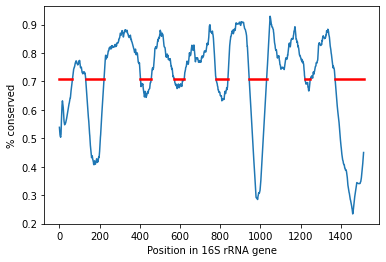

In [36]:
plt.plot(x,smoothArray, '-o',markersize = 0)

for i in range(len(start)):
    plt.plot((start[i], stop[i]), (mean, mean), color='r',linewidth=2.5)


plt.xlabel("Position in 16S rRNA gene")
plt.ylabel("% conserved")


plt.show()